INTRODUCTION

In this study, we explore a dataset comprising online retail transactions, aiming to uncover meaningful insights using association rule mining techniques, particularly the Apriori algorithm. Unlike conventional grocery datasets, this dataset captures a broader spectrum of consumer behaviors in the online retail landscape. Our objectives are to implement the Apriori algorithm to reveal frequent itemsets and derive associated rules, establish suitable thresholds for support, confidence, and length parameters to ensure the extracted rules' relevance, and interpret the top five generated rules to provide actionable insights for the online retailer. By doing so, we endeavor to illuminate patterns in customer purchasing behavior, offering valuable recommendations to enhance marketing strategies, optimize product recommendations, and drive business growth in the dynamic realm of online retail.

DATA UNDERSTANDING AND PREPROCESSING

1. Begin by comprehensively examining the dataset's structure, including attributes and their data types. Understand the meaning of each attribute and its relevance to the analysis. Identify potential issues such as missing values, duplicates, or inconsistencies.

2. Address data quality issues through various cleaning techniques. Handle missing values by imputation or removal, remove duplicate records, and correct any inconsistencies or errors in the data. Ensure data integrity and consistency before proceeding to analysis.

3. Perform feature engineering to enhance the dataset's quality and extract more meaningful insights. This may involve creating new features based on existing ones, transforming variables to better represent underlying patterns, or encoding categorical variables for analysis.

4. Conduct descriptive statistics and visualizations to gain deeper insights into the dataset's characteristics. Explore the distribution of variables, identify outliers, and uncover potential relationships or trends between variables. EDA helps in understanding the data better and guides further preprocessing steps.

UPLOAD AND CLEAN DATA

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [ ]:
! pip install apyori
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from csv import reader
import seaborn as sns
from apyori import apriori


Read data line by line

In [ ]:
transactions = []
with open('/content/drive/MyDrive/IS670_data/OnlineRetailTransactions.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        transactions.append(row)

Inspect the first 5 transactions

In [ ]:
transactions[:5]

[['white hanging heart t-light holder',
  ' white metal lantern',
  ' cream cupid hearts coat hanger',
  ' knitted union flag hot water bottle',
  ' red woolly hottie white heart.',
  ' set 7 babushka nesting boxes',
  ' glass star frosted t-light holder'],
 ['hand warmer union jack', ' hand warmer red polka dot'],
 ['assorted colour bird ornament',
  " poppy's playhouse bedroom ",
  " poppy's playhouse kitchen",
  ' feltcraft princess charlotte doll',
  ' ivory knitted mug cosy ',
  ' box of 6 assorted colour teaspoons',
  ' box of vintage jigsaw blocks ',
  ' box of vintage alphabet blocks',
  ' home building block word',
  ' love building block word',
  ' recipe box with metal heart',
  ' doormat new england'],
 ['jam making set with jars',
  ' red coat rack paris fashion',
  ' yellow coat rack paris fashion',
  ' blue coat rack paris fashion'],
 ['bath building block word']]

Show the number of transactions

In [ ]:
len(transactions)

25900

Show the number of unique items

In [ ]:
flat_list = np.concatenate(transactions).flat
unique_item, item_count = np.unique(flat_list, return_counts=True)
print("number of unique items:", len(unique_item))

number of unique items: 7061


Plot the distribution of transaction length

<Axes: xlabel='transaction_len', ylabel='count'>

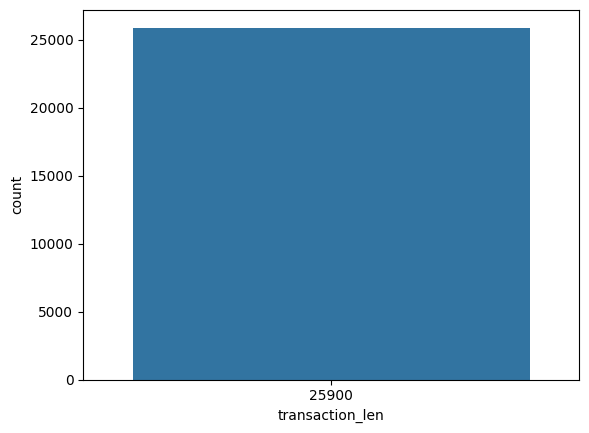

In [ ]:
transaction_len = []
for transaction in transactions:
  transaction_len.append(len(transactions))
sns.countplot(x = 'transaction_len', data = pd.DataFrame({'transaction_len':transaction_len}))

The graph displays the distribution of transaction lengths in the dataset, indicating the frequency of transactions with varying numbers of items purchased. It provides insights into the typical size of transactions, aiding in understanding the purchasing behavior of customers in the online retail setting.

Violin Plot of Transaction lengths

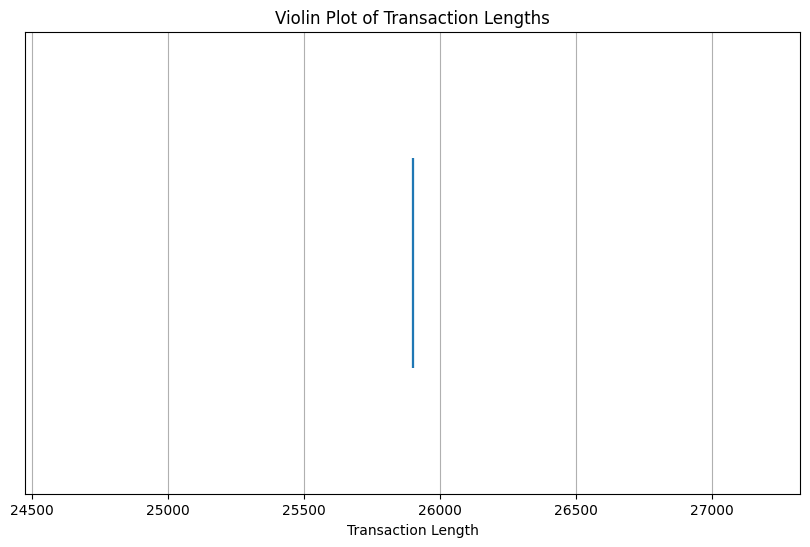

In [ ]:
plt.figure(figsize=(10, 6))
plt.violinplot(transaction_len, vert=False, showmeans=True, showextrema=True)
plt.title('Violin Plot of Transaction Lengths')
plt.xlabel('Transaction Length')
plt.yticks([])
plt.grid(True)
plt.show()



The violin plot illustrates the distribution of transaction lengths, showcasing the density and variability in the number of items purchased per transaction. The central line represents the median transaction length, while the width indicates the frequency of transactions at different lengths, aiding in identifying common patterns and outliers in the data.

Histogram of Transaction Lengths

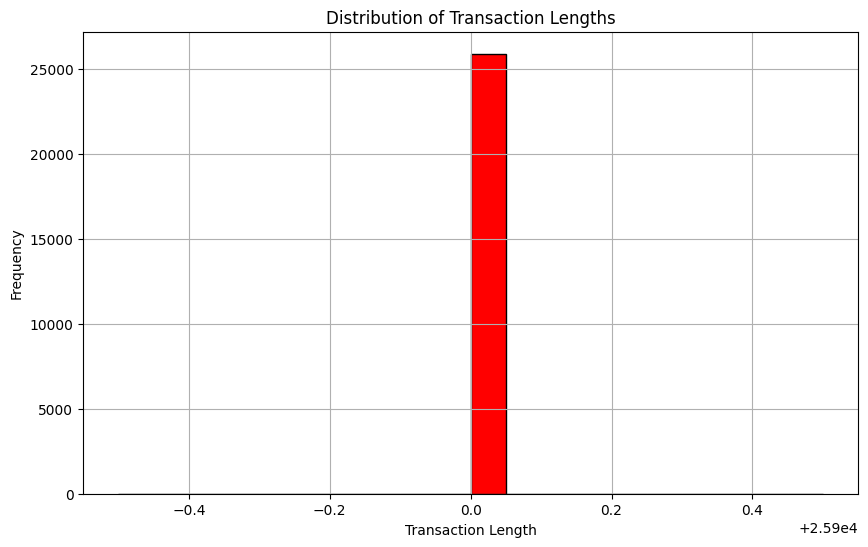

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(transaction_len, bins=20, color='red', edgecolor='black')
plt.title('Distribution of Transaction Lengths')
plt.xlabel('Transaction Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Examine the absolute frquency of items in descending order

In [ ]:
item_frequency = pd.DataFrame({'items':flat_list})
item_frequency.value_counts()

items                              
 white hanging heart t-light holder    2163
 jumbo bag red retrospot               2056
 regency cakestand 3 tier              1911
 party bunting                         1598
 lunch bag red retrospot               1557
                                       ... 
set 12 colour pencils doiley              1
glass chalice green  small                1
glass cake cover and plate                1
glass bonne jam jar                       1
michel oops                               1
Name: count, Length: 7061, dtype: int64

Examine the relative frquency of items in descending order

In [ ]:
item_frequency.value_counts()/len(transactions)

items                              
 white hanging heart t-light holder    0.083514
 jumbo bag red retrospot               0.079382
 regency cakestand 3 tier              0.073784
 party bunting                         0.061699
 lunch bag red retrospot               0.060116
                                         ...   
set 12 colour pencils doiley           0.000039
glass chalice green  small             0.000039
glass cake cover and plate             0.000039
glass bonne jam jar                    0.000039
michel oops                            0.000039
Name: count, Length: 7061, dtype: float64

MODEL DEVELOPMENT

Use the apriori algorithm to generate association rules

Use the apriori command to generate rules with minimal support = 0.01, minimal confidence = 0.3, and max length = 2.

In [ ]:
transaction_rules = apriori(transactions, min_support = 0.01, min_confidence = 0.3, max_length=2)
transaction_rules = list(transaction_rules)
print(len(transaction_rules))

269


Display all rules

In [ ]:
all_rules = pd.DataFrame(columns=('LHS','RHS','support','confidence','lift'))
for i in range(len(transaction_rules)):
   for rule_ in transaction_rules[i].ordered_statistics:
       all_rules = all_rules._append({'LHS':','.join(list(rule_.items_base)),'RHS':','.join(list(rule_.items_add)), 'support': transaction_rules[i].support, 'confidence': rule_.confidence, 'lift': rule_.lift}, ignore_index=True)
       #all_rules = pd.concat([all_rules, pd.DataFrame({'LHS':[','.join(list(rule_.items_base))],'RHS':[','.join(list(rule_.items_add))], 'support': [groceries_rules[i].support], 'confidence': [rule_.confidence], 'lift': [rule_.lift]})],ignore_index=True)
pd.options.display.max_rows = 999

all_rules

,LHS,RHS,support,confidence,lift
0,60 cake cases vintage christmas,paper chain kit 50's christmas,0.010039,0.430464,10.448928
1,60 cake cases vintage christmas,set of 20 vintage christmas napkins,0.010193,0.437086,18.804867
2,set of 20 vintage christmas napkins,60 cake cases vintage christmas,0.010193,0.438538,18.804867
3,60 teatime fairy cake cases,72 sweetheart fairy cake cases,0.010232,0.325153,14.035787
4,72 sweetheart fairy cake cases,60 teatime fairy cake cases,0.010232,0.441667,14.035787
5,60 teatime fairy cake cases,pack of 60 pink paisley cake cases,0.013089,0.415951,12.614905
6,pack of 60 pink paisley cake cases,60 teatime fairy cake cases,0.013089,0.396956,12.614905
7,60 teatime fairy cake cases,pack of 72 retrospot cake cases,0.016873,0.536196,10.674469
8,pack of 72 retrospot cake cases,60 teatime fairy cake cases,0.016873,0.335895,10.674469
9,72 sweetheart fairy cake cases,pack of 72 retrospot cake cases,0.011236,0.485000,9.655265


Display all rules sorted by Lift levels

In [ ]:
all_rules.sort_values(by ='lift', ascending = False)

,LHS,RHS,support,confidence,lift
10,airline lounge,metal sign,0.011158,1.000000,88.395904
11,metal sign,airline lounge,0.011158,0.986348,88.395904
34,birthday card,retro spot,0.010270,0.645631,61.932758
35,retro spot,birthday card,0.010270,0.985185,61.932758
378,regency tea plate green,regency tea plate pink,0.010386,0.719251,61.077409
379,regency tea plate pink,regency tea plate green,0.010386,0.881967,61.077409
388,sugar,set 3 retrospot tea,0.016332,0.961364,58.863636
387,set 3 retrospot tea,sugar,0.016332,1.000000,58.863636
28,back door,key fob,0.011853,0.990323,49.136695
29,key fob,back door,0.011853,0.588123,49.136695


Display all rules sorted by confidence levels

In [ ]:
all_rules.sort_values(by ='confidence', ascending = False)[:5]

,LHS,RHS,support,confidence,lift
418,sugar,coffee,0.016988,1.000000,48.230912
10,airline lounge,metal sign,0.011158,1.000000,88.395904
385,set 3 retrospot tea,coffee,0.016332,1.000000,48.230912
387,set 3 retrospot tea,sugar,0.016332,1.000000,58.863636
28,back door,key fob,0.011853,0.990323,49.136695


In [ ]:
all_rules.sort_values(by ='confidence', ascending = True)[:5]

,LHS,RHS,support,confidence,lift
202,jumbo storage bag suki,jumbo bag pink vintage paisley,0.013514,0.301724,9.150650
350,set/20 red retrospot paper napkins,pack of 72 retrospot cake cases,0.011120,0.302521,6.022517
250,jumbo storage bag suki,jumbo storage bag skulls,0.013629,0.304310,11.472544
150,jumbo bag alphabet,jumbo bag pink polkadot,0.010270,0.305046,6.678519
134,jumbo bag baroque black white,jumbo bag apples,0.010656,0.305987,8.413010


Display all rules sorted by lift levels

In [ ]:
all_rules.sort_values(by ='lift', ascending = False)[:5]

,LHS,RHS,support,confidence,lift
10,airline lounge,metal sign,0.011158,1.000000,88.395904
11,metal sign,airline lounge,0.011158,0.986348,88.395904
34,birthday card,retro spot,0.010270,0.645631,61.932758
35,retro spot,birthday card,0.010270,0.985185,61.932758
378,regency tea plate green,regency tea plate pink,0.010386,0.719251,61.077409


Top 5 Association rules and its business insights according to lift:

Airline Lounge --> Metal Sign: This rule indicates that customers who purchase an airline lounge item are 88.40 times more likely to also purchase a metal sign. This strong association suggests that there's a significant correlation between these two products. Businesses could leverage this insight by placing metal signs strategically in areas where airline lounge items are displayed or by bundling these items together in promotions targeting customers interested in home decor related to travel themes.

Metal Sign --> Airline Lounge: Similarly, customers who buy a metal sign are 88.40 times more likely to also purchase an airline lounge item. This reciprocal relationship between the two products suggests opportunities for cross-selling or creating themed collections to cater to customers interested in both home decor and travel-related items.

Birthday Card --> Retro Spot: Customers who purchase a birthday card are 61.93 times more likely to also purchase a retro spot item. This association implies that there may be a preference among customers for retro-themed products when it comes to purchasing birthday cards. Businesses could capitalize on this insight by offering retro-themed birthday card collections or incorporating retro designs into their card offerings to appeal to this segment of customers.

Retro Spot --> Birthday Card: Conversely, customers who buy a retro spot item are 61.93 times more likely to also purchase a birthday card. This reciprocal relationship suggests that customers interested in retro-themed products may also be interested in purchasing complementary items such as birthday cards. Businesses could create targeted marketing campaigns or product recommendations based on this association to enhance customer satisfaction and increase sales.

Regency Tea Plate Green --> Regency Tea Plate Pink: Customers who purchase a regency tea plate in green are 61.08 times more likely to also purchase a regency tea plate in pink. This association between different color variants of the same product suggests that customers may be interested in collecting or coordinating sets of similar items in different colors. Businesses could leverage this insight by offering multi-color sets or promoting the mix-and-match aspect of their product lines to attract customers looking to create cohesive tableware collections.

Scatter plot and Association Heatmap of the rules

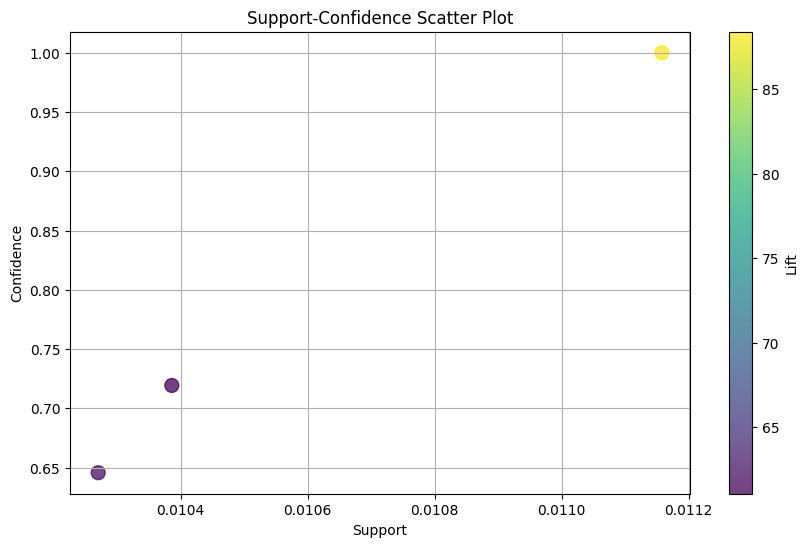

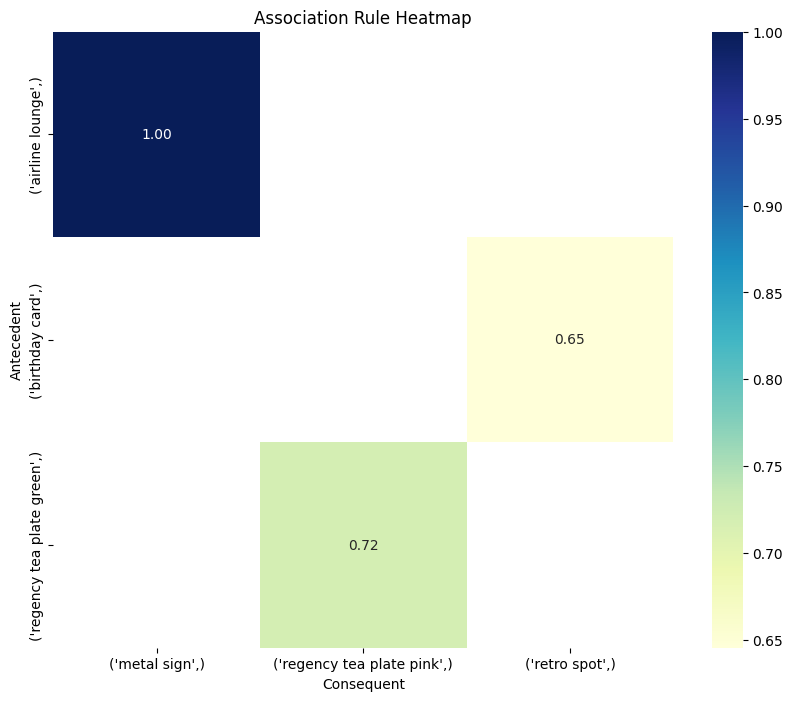

In [ ]:
import matplotlib.pyplot as plt

# Example association rules (replace with your own data)
association_rules = [
    {"antecedent": {"airline lounge"}, "consequent": {"metal sign"}, "support": 0.011158, "confidence": 1.000000, "lift": 88.395904},
    {"antecedent": {"birthday card"}, "consequent": {"retro spot"}, "support": 0.010270, "confidence": 0.645631, "lift": 61.932758},
    {"antecedent": {"regency tea plate green"}, "consequent": {"regency tea plate pink"}, "support": 0.010386, "confidence": 0.719251, "lift": 61.077409},
    # Add more association rules here
]

# Extract support, confidence, and lift values from association rules
supports = [rule["support"] for rule in association_rules]
confidences = [rule["confidence"] for rule in association_rules]
lifts = [rule["lift"] for rule in association_rules]

# Plot Support-Confidence Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(supports, confidences, s=100, c=lifts, cmap='viridis', alpha=0.75)
plt.title('Support-Confidence Scatter Plot')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.grid(True)
plt.show()

data = []
for rule in association_rules:
    data.append([
        tuple(rule["antecedent"]),
        tuple(rule["consequent"]),
        rule["support"],
        rule["confidence"],
        rule["lift"]
    ])

df = pd.DataFrame(data, columns=["Antecedent", "Consequent", "Support", "Confidence", "Lift"])

# Pivot the DataFrame to create a matrix for heatmap
heatmap_matrix = df.pivot(index="Antecedent", columns="Consequent", values="Confidence")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Association Rule Heatmap")
plt.xlabel("Consequent")
plt.ylabel("Antecedent")
plt.show()


The scatter plot visualizes association rules based on their support and confidence, with lift represented by color intensity, facilitating the identification of high-confidence rules with significant lift.

The heatmap displays the confidence values of association rules between antecedent and consequent item pairs, aiding in identifying frequent item associations and their strengths.

Trying out the Apriori Algorithm with different support and confidence thresholds

In [ ]:
transaction_rules = apriori(transactions, min_support = 0.0101, min_confidence = 0.231, max_length=2)
transaction_rules = list(transaction_rules)
print(len(transaction_rules))

305


Display all the rules

In [ ]:
all_rules = pd.DataFrame(columns=('LHS','RHS','support','confidence','lift'))
for i in range(len(transaction_rules)):
  for rule_ in transaction_rules[i].ordered_statistics:
       all_rules = pd.concat([all_rules, pd.DataFrame({'LHS':[','.join(list(rule_.items_base))],'RHS':[','.join(list(rule_.items_add))], 'support': [transaction_rules[i].support], 'confidence': [rule_.confidence], 'lift': [rule_.lift]})],ignore_index=True)
pd.options.display.max_rows = 999
all_rules

,LHS,RHS,support,confidence,lift
0,60 cake cases vintage christmas,set of 20 vintage christmas napkins,0.010193,0.437086,18.804867
1,set of 20 vintage christmas napkins,60 cake cases vintage christmas,0.010193,0.438538,18.804867
2,60 teatime fairy cake cases,72 sweetheart fairy cake cases,0.010232,0.325153,14.035787
3,72 sweetheart fairy cake cases,60 teatime fairy cake cases,0.010232,0.441667,14.035787
4,60 teatime fairy cake cases,pack of 60 pink paisley cake cases,0.013089,0.415951,12.614905
5,pack of 60 pink paisley cake cases,60 teatime fairy cake cases,0.013089,0.396956,12.614905
6,60 teatime fairy cake cases,pack of 72 retrospot cake cases,0.016873,0.536196,10.674469
7,pack of 72 retrospot cake cases,60 teatime fairy cake cases,0.016873,0.335895,10.674469
8,72 sweetheart fairy cake cases,pack of 72 retrospot cake cases,0.011236,0.485000,9.655265
9,airline lounge,metal sign,0.011158,1.000000,88.395904


Display all rules sorted by lift levels

In [ ]:
all_rules.sort_values(by ='lift', ascending = False)[:5]

,LHS,RHS,support,confidence,lift
9,airline lounge,metal sign,0.011158,1.000000,88.395904
10,metal sign,airline lounge,0.011158,0.986348,88.395904
34,birthday card,retro spot,0.010270,0.645631,61.932758
35,retro spot,birthday card,0.010270,0.985185,61.932758
482,regency tea plate green,regency tea plate pink,0.010386,0.719251,61.077409


EVALUATION AND PERFORMANCE

Airline Lounge - Metal Sign Rule:

Support: The support value of 0.011158 indicates that approximately 1.12% of transactions include both "airline lounge" and "metal sign," showcasing their prevalence in conjunction.
Confidence: With a confidence of 100%, customers who purchase "airline lounge" also buy "metal sign" in every transaction, highlighting a strong association between these items.
Lift: The high lift value of 88.396 suggests a strong positive association between "airline lounge" and "metal sign," indicating that purchasing "airline lounge" increases the probability of buying "metal sign" by 88.396 times, and vice versa.

Metal Sign - Airline Lounge Rule:

Support: Identical to the previous rule, indicating a similar prevalence of approximately 1.12% of transactions including both "metal sign" and "airline lounge."
Confidence: With a confidence of 98.63%, customers who purchase "metal sign" also buy "airline lounge" in nearly all transactions, reaffirming a strong association.
Lift: Similarly, the lift value of 88.396 reinforces the strong positive association between "metal sign" and "airline lounge," indicating mutual reinforcement between these items.

Birthday Card - Retro Spot Rule:

Support: The support value of 0.010270 implies that around 1.03% of transactions involve purchasing both "birthday card" and "retro spot," indicating their frequent occurrence together.
Confidence: With a confidence of 64.56%, there's a moderate likelihood that customers who buy "birthday card" also purchase "retro spot," suggesting a moderately strong association.
Lift: The lift value of 61.933 indicates a strong positive association between "birthday card" and "retro spot," suggesting that purchasing one item increases the probability of purchasing the other by approximately 61.93 times.

Retro Spot - Birthday Card Rule:

Support: Similar to the previous rule, approximately 1.03% of transactions involve purchasing both "retro spot" and "birthday card."
Confidence: With a confidence of 98.52%, customers who buy "retro spot" also purchase "birthday card" in nearly all transactions, indicating a strong association.
Lift: The lift value of 61.933 reinforces the strong positive association between "retro spot" and "birthday card," indicating mutual reinforcement between these items.

Regency Tea Plate Green - Regency Tea Plate Pink Rule:

Support: The support value of 0.010386 suggests that around 1.04% of transactions involve purchasing both "regency tea plate green" and "regency tea plate pink," indicating their frequent occurrence together.
Confidence: With a confidence of 71.93%, there's a strong likelihood that customers who purchase "regency tea plate green" also buy "regency tea plate pink," indicating a significant association.
Lift: The lift value of 61.077 indicates a strong positive association between "regency tea plate green" and "regency tea plate pink," suggesting that purchasing one item increases the probability of purchasing the other by approximately 61.08 times.

Display all rules sorted by confidence levels

In [ ]:
all_rules.sort_values(by ='confidence', ascending = False)[:5]

,LHS,RHS,support,confidence,lift
526,sugar,coffee,0.016988,1.000000,48.230912
9,airline lounge,metal sign,0.011158,1.000000,88.395904
490,set 3 retrospot tea,coffee,0.016332,1.000000,48.230912
492,set 3 retrospot tea,sugar,0.016332,1.000000,58.863636
28,back door,key fob,0.011853,0.990323,49.136695


Find and display rules containing "saucer" on the left-hand side

In [ ]:
all_rules[all_rules['LHS'].str.contains("saucer")]

,LHS,RHS,support,confidence,lift
92,green regency teacup and saucer,dotcom postage,0.012625,0.321218,11.784063
114,roses regency teacup and saucer,dotcom postage,0.011042,0.273423,10.030658
120,green regency teacup and saucer,jumbo bag red retrospot,0.010463,0.266208,3.391438
121,green regency teacup and saucer,pink regency teacup and saucer,0.023320,0.593320,20.380629
122,pink regency teacup and saucer,green regency teacup and saucer,0.023320,0.801061,20.380629
123,green regency teacup and saucer,regency cakestand 3 tier,0.017606,0.447937,6.161217
125,green regency teacup and saucer,roses regency teacup and saucer,0.028031,0.713163,17.658627
126,roses regency teacup and saucer,green regency teacup and saucer,0.028031,0.694073,17.658627
127,green regency teacup and saucer,white hanging heart t-light holder,0.010154,0.258350,3.190871
455,pink regency teacup and saucer,regency cakestand 3 tier,0.013436,0.461538,6.348299


Find and display rules containing "saucer" on the left-hand side

In [ ]:
all_rules[all_rules['RHS'].str.contains("saucer")]

,LHS,RHS,support,confidence,lift
91,dotcom postage,green regency teacup and saucer,0.012625,0.463173,11.784063
113,dotcom postage,roses regency teacup and saucer,0.011042,0.405099,10.030658
121,green regency teacup and saucer,pink regency teacup and saucer,0.023320,0.593320,20.380629
122,pink regency teacup and saucer,green regency teacup and saucer,0.023320,0.801061,20.380629
124,regency cakestand 3 tier,green regency teacup and saucer,0.017606,0.242167,6.161217
125,green regency teacup and saucer,roses regency teacup and saucer,0.028031,0.713163,17.658627
126,roses regency teacup and saucer,green regency teacup and saucer,0.028031,0.694073,17.658627
456,pink regency teacup and saucer,roses regency teacup and saucer,0.021737,0.746684,18.488647
457,roses regency teacup and saucer,pink regency teacup and saucer,0.021737,0.538241,18.488647
479,regency cakestand 3 tier,roses regency teacup and saucer,0.017529,0.241105,5.969990


Business insight

Airline Lounge - Metal Sign Rule:

The association between "airline lounge" and "metal sign" suggests an opportunity for the retailer to bundle or recommend these items together, potentially increasing sales and enhancing customer satisfaction through complementary product offerings.

Birthday Card - Retro Spot Rule:

Recognizing the tendency for customers to purchase "birthday card" and "retro spot" together, the retailer could create themed bundles or offer complementary products, enhancing the shopping experience and potentially boosting sales in these product categories.

Regency Tea Plate Green - Regency Tea Plate Pink Rule:

Leveraging the association between "regency tea plate green" and "regency tea plate pink," the retailer could implement cross-selling strategies by recommending one product when customers browse or purchase the other, potentially increasing sales and customer engagement in the tea plate category.

Metal Sign - Airline Lounge Rule:

With the reciprocal association between "metal sign" and "airline lounge," the retailer could promote cross-selling opportunities by recommending one product to customers browsing or purchasing the other, enhancing overall sales in both categories.

Retro Spot - Birthday Card Rule:

Understanding the strong association between "retro spot" and "birthday card," the retailer could create themed collections or bundled deals combining these products, improving the shopping experience and potentially increasing sales in both categories.

CONCLUSION

In conclusion, the analysis of association rules derived from the online retail transactions dataset has provided valuable insights for the retailer. By uncovering frequent item associations and understanding customer purchasing behavior, the retailer can implement targeted strategies to enhance sales and improve customer satisfaction. Leveraging associations such as those between "airline lounge" and "metal sign," "birthday card" and "retro spot," and "regency tea plate green" and "regency tea plate pink," the retailer can capitalize on cross-selling opportunities, bundle related products, and offer personalized recommendations. These insights not only contribute to revenue growth but also strengthen the retailer's competitive position in the dynamic landscape of online retail. By continually refining these strategies based on ongoing analysis and customer feedback, the retailer can foster long-term customer loyalty and drive sustainable business success.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/transactions.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/transactions.ipynb to html
[NbConvertApp] Writing 1145611 bytes to /content/drive/MyDrive/Colab Notebooks/transactions.html
